<a href="https://colab.research.google.com/github/nathalieveronika/extreme_value_theory/blob/master/4ClassicEVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4 - Classic Extrem Value Theory

In [0]:
from google.colab import files
from google.colab import drive

In [80]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
filepath = '/content/drive/My Drive/Bachelor Arbeit OLD/Plots/'

### Generalized Inverse Function

constructing monotone increasing function

<Figure size 432x288 with 0 Axes>

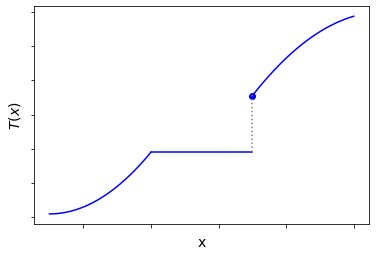

In [82]:
import matplotlib.pyplot as plt
import numpy as np
yvalues1 = []
yvalues2 = []
yvalues3 = []
x1 = np.linspace(-1,2,100)
for i in x1:
  yvalues1.append(((i+1)**2)+0.5)
x2 = np.linspace(2,4.999,100)
for i in x2:
  yvalues2.append(((2+1)**2)+0.5)
x3 = np.linspace(5,8,100)
for i in x3:
  yvalues3.append(-(0.9*i-8)**2+30)

x = np.linspace(-1,8,300)
f = plt.figure()
fig, ax = plt.subplots()

plt.scatter(5,-(0.9*5-8)**2+30,color="blue")
plt.plot(x1,yvalues1,color="blue")
plt.plot(x2,yvalues2,color="blue")
plt.plot(x3,yvalues3,color="blue")
plt.axvline(x=5, ymin=0.33, ymax=0.6,linestyle=':',color="grey")
plt.xlabel('x',fontsize=14)
plt.ylabel('$T(x)$',fontsize=14)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig(filepath+"function_T.png", bbox_inches = 'tight')
plt.show()

and its generalized inverse $\varPsi^{-}(y)\doteq\inf\Bigl\{ x\in\mathbb{R}\mid\varPsi(x)\geq y\Bigr\},\:y\in\mathbb{R}$

In [0]:
from bisect import bisect_left

def find_ge(a, x):
    'Find leftmost item greater than or equal to x'
    i = bisect_left(a, x)
    if i != len(a):
        return i#a[i]
    raise ValueError

<Figure size 432x288 with 0 Axes>

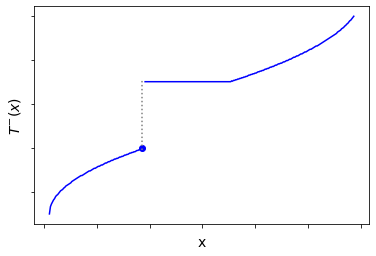

In [84]:
f = plt.figure()
fig, ax = plt.subplots()
yvalues= yvalues1+yvalues2+yvalues3
x = np.linspace(-1,8,300)

y = np.linspace(0.5,29.36,300)
gen_inverse = []
for i in y:
  gen_inverse.append(x[find_ge(yvalues, i)])
y1 = y[0:94]
plt.plot(y1,gen_inverse[0:94],color="blue")
y2 = y[94:180]
plt.plot(y2,gen_inverse[94:180],color="blue")
y3 = y[180:300]
plt.plot(y3,gen_inverse[180:300],color="blue")
plt.axvline(x=9.3, ymin=0.34, ymax=0.66,linestyle=':',color="grey")
plt.scatter(9.3,2,color="blue")
plt.xlabel('x',fontsize=14)
plt.ylabel('$T^{-}(x)$',fontsize=14)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig(filepath+"geninverse_function_T.png", bbox_inches = 'tight')
plt.show()

### Introducing Extreme Value Distributions and their pdf's

Plot of **Gumbel** density function and **Frechét**, **Weibull** density function with $\alpha = 1$

<Figure size 432x288 with 0 Axes>

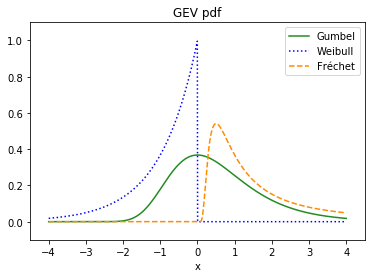

In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(-4,4,1000)
alpha = 1
#plt.plot(x, gumbel_r.pdf(x))
#plt.plot(x,weibull_max.pdf(x,alpha))
#plt.plot(x,invweibull.pdf(x,alpha))

plt.xlim(-4.5,4.5) 
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.title('GEV pdf')
ax.plot(x, gumbel_r.pdf(x),label='Gumbel',color="forestgreen") 
ax.plot(x,weibull_max.pdf(x,alpha),label='Weibull',linestyle=":",color="blue") 
ax.plot(x,invweibull.pdf(x,alpha),label='Fréchet',linestyle="--",color="darkorange")
legend = ax.legend() 
plt.savefig(filepath+"myEVdensities.png", bbox_inches = 'tight')
#files.download("myEVdensities.png")
plt.show()

Plot of **Gumbel** distribution function and **Frechét**, **Weibull** distribution function with $\alpha = 1$

<Figure size 432x288 with 0 Axes>

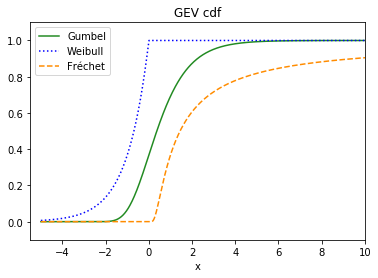

In [86]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(-5,15,1000)
alpha = 1
#plt.plot(x, gumbel_r.pdf(x))
#plt.plot(x,weibull_max.pdf(x,alpha))
#plt.plot(x,invweibull.pdf(x,alpha))

plt.xlim(-5.5,10) 
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.title('GEV cdf')
ax.plot(x, gumbel_r.cdf(x),label='Gumbel',color="forestgreen") 
ax.plot(x,weibull_max.cdf(x,alpha),label='Weibull',linestyle=":",color="blue") 
ax.plot(x,invweibull.cdf(x,alpha),label='Fréchet',linestyle="--",color="darkorange")
legend = ax.legend() 
plt.savefig(filepath+"myEVdistributions.png", bbox_inches = 'tight')
#files.download("myEVdensities.png")
plt.show()

### Analogies between Fisher-Tippet Theorem and CLT

Consider i.i.d. random variables which are **Exp(1)** distributed. 

> As n increases the normalised and centered maxima converges to a Gumbel distribution.



<Figure size 432x288 with 0 Axes>

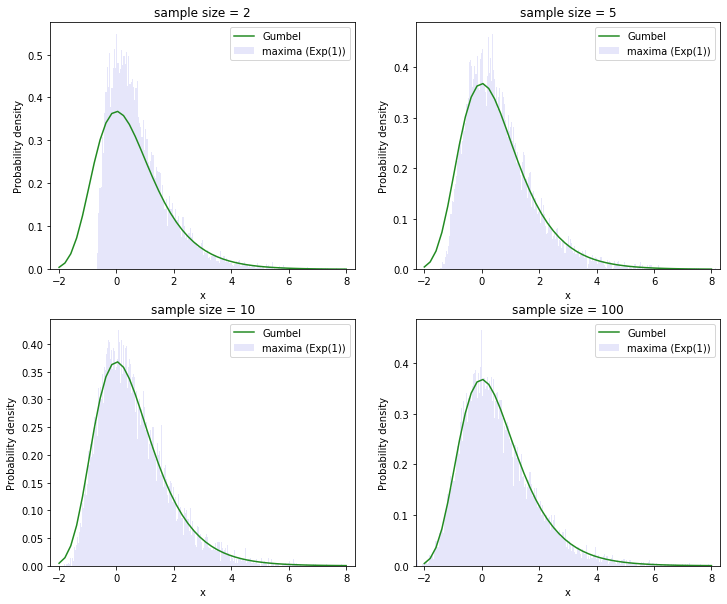

In [87]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

f = plt.figure() 
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) #zwei reihen
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4) #nebeneinander
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(4) #untereinander
 
#drawing sample from exponential distribution with lambda = llambda = 1/scale
#empty list to insert the maximum of each draw (10000 times)

#for sample_size_n in [2**i for i in range(1,7)]:
for sample_size_n, ax in zip([2,5,10,100],[ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.exponential(scale=1,size=sample_size_n) 
      maxima.append(sample.max()-math.log(sample_size_n)) #centered by ln(n)
  
  x = np.linspace(-2,8)
  ax.plot(x, gumbel_r.pdf(x),label='Gumbel',color="forestgreen")
  ax.hist(maxima,bins=300,density=True,label='maxima (Exp(1))',color="lavender")
  ax.title.set_text(f'sample size = {sample_size_n}')
  ax.legend()
  ax.set_xlim(-2.3,8.3)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')

#plt.subplots_adjust(left=-2) #nebeneinander
#plt.subplots_adjust(top=3) #untereinander
#plt.subplots_adjust() #zwei reihen, top=1.5,right=1.4, bottom=0, left=-0.1
plt.savefig(filepath+"Exponential&Gumbel.png", bbox_inches = 'tight')
plt.show()


Consider i.i.d. random variables which are **Cauchy** distributed.



> As n increases the normalised and centered maxima converges to a Fréchet distribution

<Figure size 432x288 with 0 Axes>

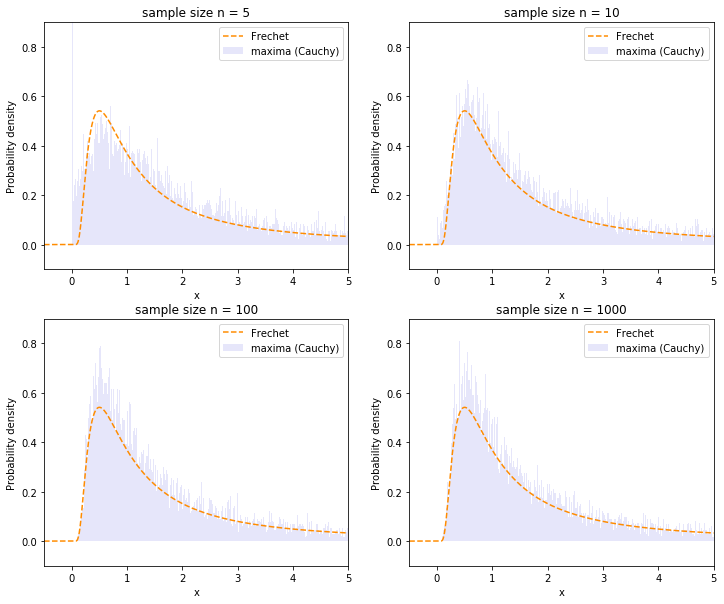

In [100]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, invweibull
from mpmath import *

#mp.dps = 2; mp.pretty = True
f = plt.figure()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) 

alpha = 1
for sample_size_n, ax in zip([5,10,100,1000], [ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.standard_cauchy(size=sample_size_n)
      if sample.max()>0:
            maxima.append(float(sample.max()/cot(pi/sample_size_n))) #centered and normalizes with b=0, a=cot(pi/n) 
            #maxima.append(float(sample.max()*(pi/sample_size_n)))  
            # auch mal mit 1/(tan(pi/2-pi/sample_size_n)) probiert, 
            # dann brauchts noch diese Bedingung: and tan(pi/2-pi/sample_size_n)!=0
            
      else:
        maxima.append(0)
  x = np.linspace(-4,5,10000)
  ax.set_xlim(-0.5,5) 
  ax.set_ylim(-0.1,0.9)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')
  ax.plot(x,invweibull.pdf(x,alpha),label='Frechet',linestyle="--",color="darkorange")
  maxima = np.array(maxima)
  maxima = maxima[(maxima>-4) & (maxima<5)]
 
  ax.hist(maxima,bins=300,density=True,label='maxima (Cauchy)',color="lavender") 
  ax.title.set_text(f'sample size n = {sample_size_n}')
  ax.legend()

plt.savefig(filepath+"Chauchy&Frechet.png", bbox_inches = 'tight')
plt.show()


Consider i.i.d. random variables which are **Uniformly** distributed on (0,1).

> As n increases the normalised and centered maxima converges to a Weibull distribution with alpha = 1

<Figure size 432x288 with 0 Axes>

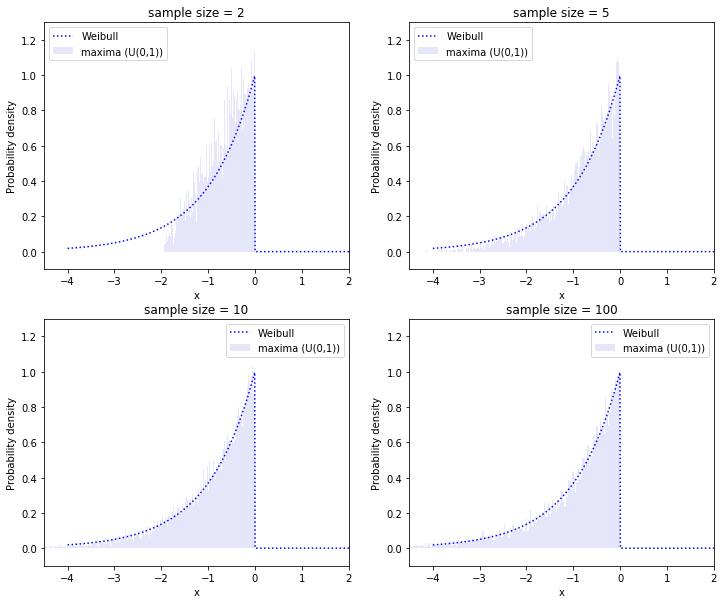

In [89]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) 

alpha = 1
for sample_size_n, ax in zip([2,5,10,100],[ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.uniform(0,1,size=sample_size_n) 
      maxima.append((sample.max()-1)*sample_size_n) #centered and normalizes with b=1, a=n
   
  x = np.linspace(-4,4,1000)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')
  ax.plot(x,weibull_max.pdf(x,alpha),label='Weibull',linestyle=":",color="blue") 
  ax.hist(maxima,bins=300,density=True,label='maxima (U(0,1))',color="lavender")
  ax.title.set_text(f'sample size = {sample_size_n}')
  ax.legend()
  ax.set_xlim(-4.5,2)
  ax.set_ylim(-0.1,1.3)

plt.savefig(filepath+"Uniform&Weibull.png", bbox_inches = 'tight')
           
plt.show()

### Introducing Generalized Pareto distribution and its pmf and cdf


probability denisity functions for $\xi=1,5,10$, $\,\sigma = 0,1$ and $\mu = 0$



<Figure size 432x288 with 0 Axes>

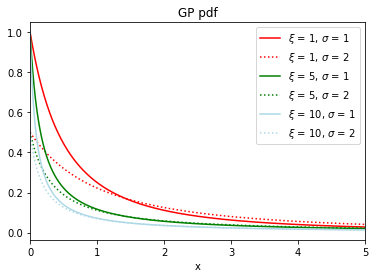

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(0,5,1000)
xi = [1,5,10]
sigma = [1,2]
ax.title.set_text("GP pdf")
ax.set_xlim(0,5) 
#plt.ylim(-0.1,1.1)
plt.xlabel('x')
#plt.ylabel('Probability density')
ax.plot(x, genpareto.pdf(x,c=xi[0],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[0]}', color = "red")
ax.plot(x, genpareto.pdf(x,c=xi[0],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "red")
ax.plot(x, genpareto.pdf(x,c=xi[1],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[0]}', color = "green")
ax.plot(x, genpareto.pdf(x,c=xi[1],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "green")
ax.plot(x, genpareto.pdf(x,c=xi[2],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[0]}', color = "lightblue")
ax.plot(x, genpareto.pdf(x,c=xi[2],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "lightblue")

legend = ax.legend() 
plt.savefig(filepath+"myGPdensities.png", bbox_inches = 'tight')
plt.show()

cummulative distribution functions for $\xi=1,5,10$, $\,\sigma = 0,1$ and $\mu = 0$


<Figure size 432x288 with 0 Axes>

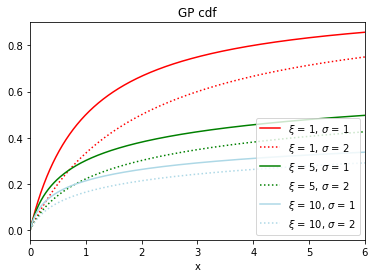

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(0,6,1000)
xi = [1,5,10]
sigma = [1,2]
ax.title.set_text("GP cdf")
ax.set_xlim(0,6) 
#plt.ylim(-0.1,1.1)
plt.xlabel('x')
ax.plot(x, genpareto.cdf(x,c=xi[0],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[0]}', color = "red")
ax.plot(x, genpareto.cdf(x,c=xi[0],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "red")
ax.plot(x, genpareto.cdf(x,c=xi[1],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[0]}', color = "green")
ax.plot(x, genpareto.cdf(x,c=xi[1],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "green")
ax.plot(x, genpareto.cdf(x,c=xi[2],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[0]}', color = "lightblue")
ax.plot(x, genpareto.cdf(x,c=xi[2],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "lightblue")

legend = ax.legend(loc='lower right') 
plt.savefig(filepath+"myGPdistributions.png", bbox_inches = 'tight')
plt.show()